### Analysis of an E-commerce Dataset

We have been provided with a combined e-commerce dataset. In this dataset, each user has the ability to post a rating and review for the products they purchased. Additionally, other users can evaluate the initial rating and review by expressing their trust or distrust.

This dataset includes a wealth of information for each user. Details such as their profile, ID, gender, city of birth, product ratings (on a scale of 1-5), reviews, and the prices of the products they purchased are all included. Moreover, for each product rating, we have information about the product name, ID, price, and category, the rating score, the timestamp of the rating and review, and the average helpfulness of the rating given by others (on a scale of 1-5).

The dataset is from several data sources, and we have merged all the data into a single CSV file named 'A Combined E-commerce Dataset.csv'. The structure of this dataset is represented in the header shown below.

| userId | gender | rating | review| item | category | helpfulness | timestamp | item_id | item_price | user_city|

    | ---- | ---- | ---- | ---- | ---- | ---- | ---- | ---- | ---- |  ---- |  ---- |  
    
#### Description of Fields

* __userId__ - the user's id
* __gender__ - the user's gender
* __rating__ - the user's rating towards the item
* __review__ - the user's review towards the item
* __item__ - the item's name
* __category__ - the category of the item
* __helpfulness__ - the average helpfulness of this rating
* __timestamp__ - the timestamp when the rating is created
* __item_id__ - the item's id
* __item_price__ - the item's price
* __user_city__ - the city of user's birth

Note that, a user may rate multiple items and an item may receive ratings and reviews from multiple users. The "helpfulness" is an average value based on all the helpfulness values given by others.

There are four questions to explore with the data as shown below.



<img src="data-relation.png" align="left" width="400"/>



## Student Name : Budhil Chakma
## Student ID : 47554266


In [48]:
#importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

 #### Q1. Remove missing data
 
Please remove the following records in the csv file: 
 
 * gender/rating/helpfulness is missing
 * review is 'none'

__Display the DataFrame, counting number of Null values in each column, and print the length of the data__ before and after removing the missing data.  

In [49]:
#reading the dataFrame 

dataFrameRead = pd.read_csv('The E-commerce Dataset.csv')                   

In [50]:
#displaying data frame

dataFrameRead

,userId,timestamp,review,item,rating,helpfulness,gender,category,item_id,item_price,user_city
0,4051,12807,Great job for what it is!,eBay,5.0,2.0,F,Online Stores & Services,88,149.00,39
1,4052,122899,Free Access Worth your Time,NetZero,5.0,0.0,F,Online Stores & Services,46,53.00,39
2,33,12700,AOL..I love you!!!!!!!!!!!!,AOL (America Online),5.0,4.0,F,Online Stores & Services,0,145.84,31
3,33,21000,EBAY!!! I LOVE YOU!!!! :-)*,eBay,5.0,4.0,F,Online Stores & Services,88,149.00,31
4,33,22300,Blair Witch...Oh Come On.......,Blair Witch Project,1.0,4.0,F,Movies,12,44.00,31
...,...,...,...,...,...,...,...,...,...,...,...
19995,10805,50600,The Upper Class Fast Food,Wendy's,2.0,3.0,F,Restaurants & Gourmet,84,69.00,18
19996,10806,82201,What more can you ask for????,Olive Garden,4.0,0.0,M,Restaurants & Gourmet,49,32.00,28
19997,10806,82201,Excellent steak for a good price,Outback Steakhouse,4.0,3.0,M,Restaurants & Gourmet,50,25.00,28
19998,10807,31504,Different story world,J. K. Rowling - Harry Potter and the Sorcerer'...,4.0,0.0,M,Books,36,96.00,27


In [51]:
#counting the number of null values in each column

nullValues = pd.DataFrame({'No. of null values': [len (dataFrameRead [dataFrameRead["userId"].isnull()]),len (dataFrameRead [dataFrameRead["gender"].isnull()]),len (dataFrameRead [dataFrameRead["rating"].isnull()]),len( dataFrameRead[(dataFrameRead.review == 'none')] ),len (dataFrameRead [dataFrameRead["item"].isnull()]),len (dataFrameRead [dataFrameRead["category"].isnull()]),len (dataFrameRead [dataFrameRead["helpfulness"].isnull()]),len (dataFrameRead [dataFrameRead["timestamp"].isnull()]),len (dataFrameRead [dataFrameRead["item_id"].isnull()]),len (dataFrameRead [dataFrameRead["item_price"].isnull()]),len (dataFrameRead [dataFrameRead["user_city"].isnull()])] }, 
             index=['User ID','Gender','Rating','Review','Item','Category','Helpfulness','TimeStamp','Item ID','Item Price','User City'])

#Displaying the number of null values in each column

nullValues


,No. of null values
User ID,0
Gender,27
Rating,17
Review,18
Item,0
Category,0
Helpfulness,22
TimeStamp,0
Item ID,0
Item Price,0


In [52]:
#cleaning the data storing the clean data in dataFrameClean

dataFrameClean = dataFrameRead.dropna(subset=['gender', 'rating', 'helpfulness'])
dataFrameClean = dataFrameClean[dataFrameClean['review'] != 'none']

In [53]:
#printing the length of the data before removing the missing data.

print("Before :")
print("Rows: ",dataFrameRead.shape[0]," and Columns: ",dataFrameRead.shape[1])

#printing the length of the data after removing the missing data.

print("After :")
print("Rows: ",dataFrameClean.shape[0]," and Columns: ",dataFrameClean.shape[1])

Before :
Rows:  20000  and Columns:  11
After :
Rows:  19916  and Columns:  11


#### Q2. Descriptive statistics

With the cleaned data in Q1, please provide the data summarization as below:

* Q2.1 total number of unique users, unique reviews, unique items, and unique categories
* Q2.2 descriptive statistics, e.g., the total number, mean, std, min and max regarding all rating records
* Q2.3 descriptive statistics, e.g., mean, std, max, and min of the number of items rated by different genders 
* Q2.4 descriptive statistics, e.g., mean, std, max, min of the number of ratings that received by each items 


In [54]:
# Calculating the total number of unique users

unique_users = dataFrameClean['userId'].nunique()

# Calculating the total number of unique reviews

unique_reviews = dataFrameClean['review'].nunique()

# Calculating the total number of unique items

unique_items = dataFrameClean['item'].nunique()

# Calculating the total number of unique categories

unique_categories = dataFrameClean['category'].nunique()

#printing the result

print("Total number of unique users:", unique_users)
print("Total number of unique reviews:", unique_reviews)
print("Total number of unique items:", unique_items)
print("Total number of unique categories:", unique_categories)

Total number of unique users: 8562
Total number of unique reviews: 19459
Total number of unique items: 89
Total number of unique categories: 9


In [55]:
# Calculating descriptive statistics for all rating records

rating_statistics = dataFrameClean['rating'].describe()

#printing the result

print("Descriptive statistics for 'rating' column:")
print(rating_statistics)

Descriptive statistics for 'rating' column:
count    19916.000000
mean         3.701798
std          1.404451
min          1.000000
25%          3.000000
50%          4.000000
75%          5.000000
max          5.000000
Name: rating, dtype: float64


In [56]:
# Grouping the data by gender and calculating the statistics for the number of items rated

gender_item_statistics = dataFrameClean.groupby('gender')['item'].count().describe()

#printing the result

print("Descriptive statistics for the number of items rated by different genders:")
print(gender_item_statistics)

Descriptive statistics for the number of items rated by different genders:
count        2.000000
mean      9958.000000
std        233.345238
min       9793.000000
25%       9875.500000
50%       9958.000000
75%      10040.500000
max      10123.000000
Name: item, dtype: float64


In [57]:
# Grouping the data by item and calculate the statistics for the number of ratings received

item_rating_statistics = dataFrameClean.groupby('item')['rating'].describe()

# Displaying the descriptive statistic 

item_rating_statistics

,count,mean,std,min,25%,50%,75%,max
item,,,,,,,,
AOL (America Online),939.0,2.500532,1.368528,1.0,1.00,2.0,4.0,5.0
All Advantage,657.0,3.412481,1.541706,1.0,2.00,4.0,5.0,5.0
Alta Vista (by 1stUp),157.0,3.541401,1.263341,1.0,3.00,4.0,4.0,5.0
Amazon.com,240.0,3.683333,1.571095,1.0,2.00,4.0,5.0,5.0
American Airlines,185.0,3.054054,1.417015,1.0,2.00,3.0,4.0,5.0
...,...,...,...,...,...,...,...,...
Wendy's,210.0,3.971429,1.093322,1.0,3.25,4.0,5.0,5.0
What Lies Beneath,160.0,3.450000,1.201676,1.0,3.00,3.5,4.0,5.0
X-Men,245.0,4.118367,0.853074,1.0,4.00,4.0,5.0,5.0


#### Q3. Plotting and Analysis

Please try to explore the correlation between gender/helpfulness/category and ratings; for instance, do female/male users tend to provide higher ratings than male/female users? Hint: you may use the boxplot function to plot figures for comparison (___Challenge___)
    
You may need to select the most suitable graphic forms for ease of presentation. Most importantly, for each figure or subfigure, please summarise ___what each plot shows___ (i.e. observations and explanations). Finally, you may need to provide an overall summary of the data.

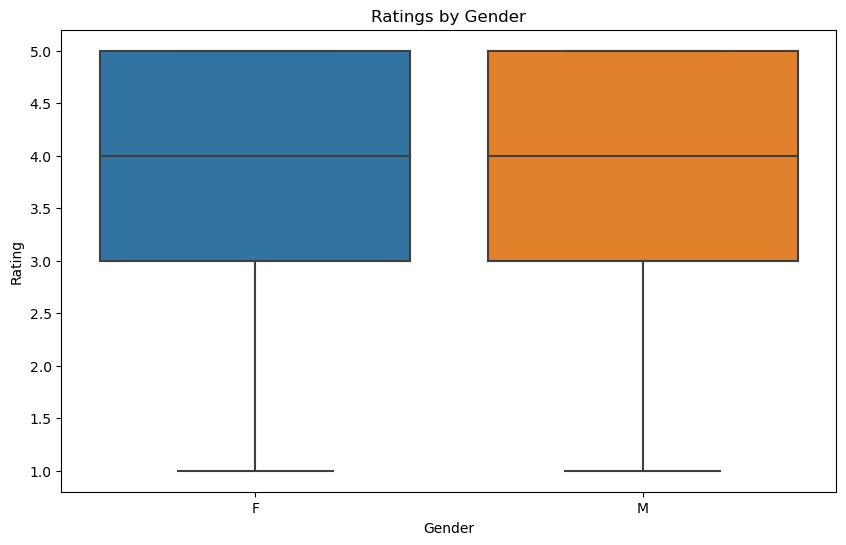

In [58]:
# Creating a boxplot to compare ratings by gender

plt.figure(figsize=(10, 6))
sns.boxplot(x='gender', y='rating', data=dataFrameClean)
plt.title('Ratings by Gender')
plt.xlabel('Gender')
plt.ylabel('Rating')
plt.show()

#### Observation :
The boxes for both males and females in terms of ratings are pretty identical to each other. Both of them have a normal distribution. They have the same median and the same upper and lower whisker. The ratings of both males and females are mainly concentrated in the range of 3 to 5. 75% of the ratings are above 3.
#### Explanation :
The boxplot shows that males and females gave the same kind of rating. As the median is close to 4 and the lower quartile and the upper quartile for both plots range from 3 to 5, it can be said that both males and females gave comparatively high ratings to the items purchased by them. So it can be assumed that the majority of them were reasonably satisfied with the item they bought. Although, some of them were not, as we can see the lower whiskers of both boxes are close to 1.

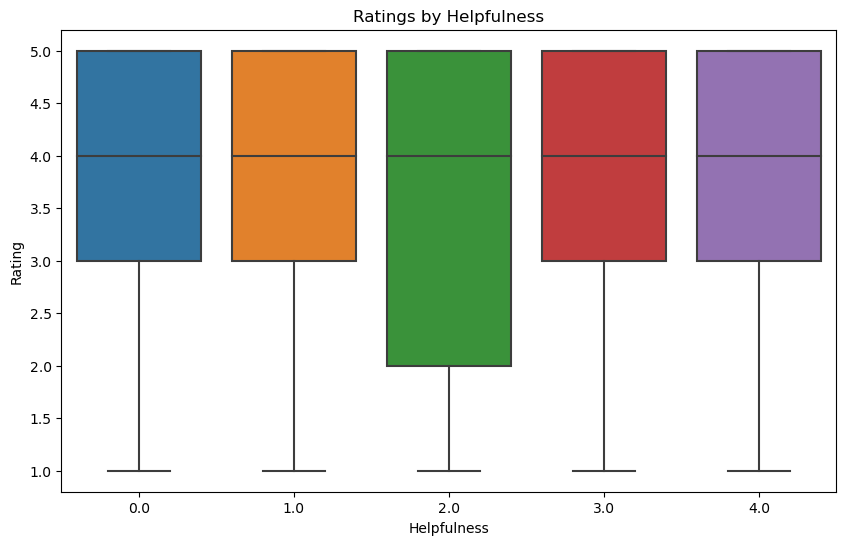

In [59]:
# Creating a boxplot to compare ratings by helpfulness

plt.figure(figsize=(10, 6))
sns.boxplot(x='helpfulness', y='rating', data=dataFrameClean)
plt.title('Ratings by Helpfulness')
plt.xlabel('Helpfulness')
plt.ylabel('Rating')
plt.show()


#### Observation :
The median and the lower whisker of all the boxes are the same. All the boxes have normal distribution except the helpfulness 2.0 which has a negative skew.
#### Explanation :
The ratings ranging from 3 to 5 received both high, low and medium helpfulness ratings, indicating mixed levels of helpfulness. The people who gave helpfulness 0,1,3 and 4 mostly rated the helpfulness of the ratings ranging from 3 to 5. where the people who gave helpfulness 2 rated the ratings ranging from 2 to 5. So the rating ranging from 1 to 3 barely got any helpfulness rating from other people.

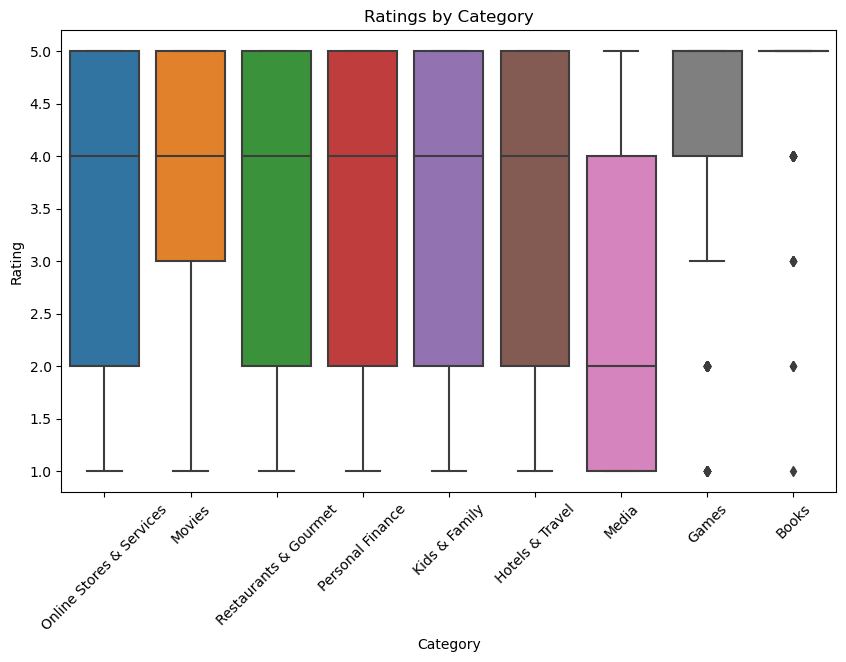

In [60]:
# Creating a boxplot to compare ratings by category

plt.figure(figsize=(10, 6))
sns.boxplot(x='category', y='rating', data=dataFrameClean)
plt.title('Ratings by Category')
plt.xlabel('Category')
plt.ylabel('Rating')
plt.xticks(rotation=45)
plt.show()

#### Observation :
Most of the categories have the same median in the above plot and only the Movies category has a normal distribution, whereas others have a negative skew. Compare to them the Media category has a low median and the Games category has a high lower whisker with few outliners. Where number the of ratings received by the Books category is lower compared to other categories.
#### Explanation :
By observing the boxes for online stores, Restaurants, Personal Finance, Kids & family and Hotels & travel categories it can be said that these categories have both high and low ratings given to them as the lower quartile and the upper quartile of these categories ranges from 2 to 5. Indicating mixed feelings from the customers. The movie category got high ratings compared to those. Whereas the media category has a lower median and positive skew, indicating the customers were not very satisfied with the products of this category. The games category was able to satisfy its customers as it mostly got high ratings. Where the book category had a few ratings compare to other categories meaning very few customers rated the products under this category.

## Summary :
The comparison of the rating between males and females based on gender shows that both gender rated the products in the same way implying both the males and females had the same feelings about products.<br>
The plot comparing the helpfulness and rating show that the people had mixed feelings about the helpfulness of the ratings of the products. <br>
The comparison between different categories and ratings shows the ratings received by different categories. The games category received mostly high ratings compared to others and the media category mostly received low ratings. Where the book category's ratings were not suitable for comparison as it received a low number of ratings compared to others.

#### Q4. Detect and remove outliers

We may define outlier users, reviews and items with three rules (if a record meets one of the rules, it is regarded as an outlier):

* reviews of which the helpfulness is no more than 2
* users who rate less than 7 items
* items that receives less than 11 ratings 
 
Please remove the corresponding records in the csv file that involves outlier users, reviews and items. After that, __print the length of the data__.

In [62]:
# removing the outliners according to the rules and storing the data without outliners in dataFrame_without_outliners

dataFrame_without_outliners = dataFrameClean.drop(dataFrameClean.index[(dataFrameClean['helpfulness'] <= 2) |
                                                     (dataFrameClean['userId'].map(dataFrameClean['userId'].value_counts()) < 7) |
                                                     (dataFrameClean['item_id'].map(dataFrameClean['item_id'].value_counts()) < 11)]
                                 )

# Printing  the length of the cleaned data without outliners

print("Length of cleaned data:", len(dataFrame_without_outliners))

Length of cleaned data: 3750
